In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set(font_scale=1.5)

**************************************************

Testing param sweep -- large-goods wp

**************************************************

In [21]:
df = pd.read_pickle("testing_sweep_pairs.pkl",compression='bz2')
df['NRecovered'] = df['FracRecovered']*df['NStaff']
df['NInfected'] = df['NRecovered']-1
df['outbreak'] = (df['NRecovered'] > 3)
df.columns

Index(['Group', 'NStaff', 'Iteration', 'FracRecovered', 'FomiteInfectionFrac',
       'CohortInfectionFrac', 'RandContactInfectionFrac', 'PairInfectionFrac',
       'RoomInfectionFrac', 'ExtIntroFrac', 'CustIntroFrac', 'CarShareInfFrac',
       'HouseShareInfFrac', 'CustomersInfected', 'IsolatorsFrac',
       'SympIsolatorsFrac', 'FPIsolatorsFrac', 'TPSympIsolatorsFrac',
       'TPAsympIsolatorsFrac', 'IndexCaseInfections', 'IndexCaseViralLoad',
       'IndexCaseInfectivity', 'OverallOutbreakLength', 'fixed_loader_pairs',
       'is_testing', 'Dtime', 'protocol', 'tperiod', 'specificity', 'Ltime',
       'fixed_driver_pairs', 'new_comply_prob', 'tD', 'SimType',
       'BreakContactProb', 'TeamTimes', 'PkgHlife', 'phi', 'TeamDistances',
       'is_driver_pairs', 'InfInit', 'HouseShareFactor', 'CarShareFactor',
       'Psusc', 'delay', 'Pisol', 'NDteams', 'is_cohorts', 'is_loader_pairs',
       'p_contact', 'test_pause', 'CohortChangeRate', 'p_fomite_trans',
       'is_window_open', 'NOt

In [22]:
TProtos = np.array(['No Testing','PCR_mass_testing','LFD_mass_testing'])
df['ProtocolStr'] = TProtos[df['protocol'].to_numpy()]
dfbaseline = df.loc[lambda DF: (DF['protocol'] == 0)]
dfball = dfbaseline.loc[lambda DF: (DF['Group'] == 'All')]

In [23]:
dftest = df.loc[lambda DF: (DF['protocol'] != 0)]
Delays = np.unique(dftest["delay"])
NCP = np.unique(dftest["new_comply_prob"])
Tperiod = np.unique(dftest["tperiod"])

print('II = ', np.unique(dftest["InfInit"]))
print('TD = ', np.unique(dftest["tD"]))
print('Phi = ', np.unique(dftest['phi']))
print('Pisol = ', np.unique(dftest['Pisol']))
print('Specificity = ', np.unique(dftest['specificity']))
print('Random contact rate = ', np.unique(dftest['p_contact']))
print('Staff totals = ', np.unique(dftest['NStaff']))

II =  [0]
TD =  [0.1]
Phi =  [1.]
Pisol =  [0.5]
Specificity =  [0.999]
Random contact rate =  [0.04545455]
Staff totals =  [ 8 16 20 44]


In [24]:
dfall = dftest.loc[dftest['Group']=='All',:]
dfall['scenario'] = np.zeros(len(dfall),dtype=np.object)
dfall.loc[lambda df: (df["ProtocolStr"]=='LFD_mass_testing'),'scenario'] = "LFD"
dfall.loc[lambda df: (df["ProtocolStr"]=='PCR_mass_testing') &\
                     (df["delay"]==0),'scenario'] = "PCR - 0 delay"
dfall.loc[lambda df: (df["ProtocolStr"]=='PCR_mass_testing') &\
                     (df["delay"]==1),'scenario'] = "PCR - 1 day delay"
dfall.loc[lambda df: (df["ProtocolStr"]=='PCR_mass_testing') &\
                     (df["delay"]==2),'scenario'] = "PCR - 2 day delay"

print(sum(dfall['scenario'] == "LFD"))
print(sum(dfall['scenario'] == "PCR - 0 delay"))
print(sum(dfall['scenario'] == "PCR - 1 day delay"))
print(sum(dfall['scenario'] == "PCR - 2 day delay"))

/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


210000
210000
210000
210000


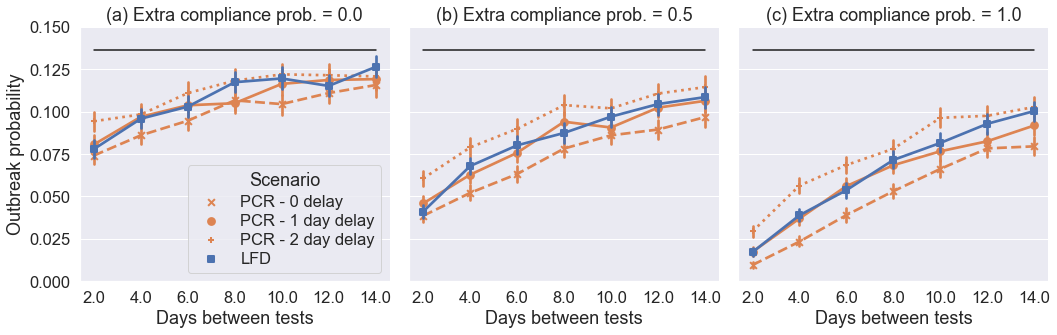

In [25]:
sns.set_color_codes()

CL = 'C0'
CP0 = "C1"
CP1 = "C1"
CP2 = "C1"

paltest={'LFD':CL, 'PCR - 0 delay':CP0, 'PCR - 1 day delay':CP1, 'PCR - 2 day delay':CP2}

sp = sns.catplot(x="tperiod", y="outbreak",hue='scenario',col='new_comply_prob',\
                 data=dfall,kind='point',palette=paltest, legend=False, \
                 hue_order=['PCR - 0 delay', 'PCR - 1 day delay', 'PCR - 2 day delay','LFD'],\
                 markers=["x", "o","+","s"], linestyles=["--", "-",":","-"])
sp.set(xlabel='Days between tests',ylim=(0,0.15))
ax = sp.axes.flatten()
ax[0].set_ylabel('Outbreak probability')
lab = ['a','b','c']
for i in range(3):
    ax[i].set_title('(%s) Extra compliance prob. = %.1f'%(lab[i],NCP[i]))

ax[0].legend(loc='lower right',title='Scenario',labelspacing=0.25)
plt.tight_layout()
mean_baseline = np.mean(dfball['outbreak'])
for i in np.arange(3):
    ax[i].plot(Tperiod.astype("|S3"),mean_baseline*np.ones(len(Tperiod)),c='k')

sp.savefig('test_outbreak_pairs.png')

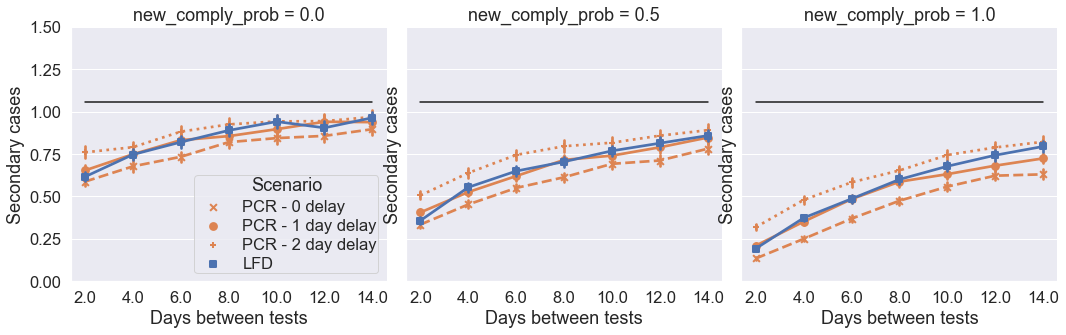

In [26]:
sp = sns.catplot(x="tperiod", y="NInfected",hue="scenario", col='new_comply_prob',data=dfall,\
                 kind='point',palette=paltest,\
                 hue_order=['PCR - 0 delay', 'PCR - 1 day delay', 'PCR - 2 day delay','LFD'],\
                 markers=["x", "o","+","s"], linestyles=["--", "-",":","-"], legend=False)
sp.set(xlabel='Days between tests', ylabel='Secondary cases',ylim=(0,1.5))
ax = sp.axes.flatten()
ax[0].legend(loc='lower right',title='Scenario',borderpad=0.1,labelspacing=0.25)
mean_baseline = np.mean(dfball['NInfected'])
for i in np.arange(3):
    ax[i].plot(Tperiod.astype("|S3"),mean_baseline*np.ones(len(Tperiod)),c='k')

/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


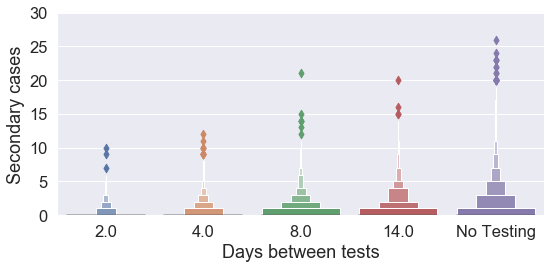

In [27]:
dfNCP1 = dfall.loc[lambda DF: (DF['scenario'] == 'LFD') & \
           ((DF['tperiod'] == 2) | (DF['tperiod'] == 4) | \
            (DF['tperiod'] == 8) | (DF['tperiod'] == 14)) &\
           (DF['new_comply_prob']==1)]
dfball['tperiod'] = 'No Testing'
dfNCP1 = pd.concat([dfNCP1, dfball])
sp = sns.catplot(x="tperiod", y="NInfected", data=dfNCP1, kind='boxen',height=4, aspect=8/4)
sp.set(xlabel='Days between tests',ylabel='Secondary cases',ylim=(0,30))

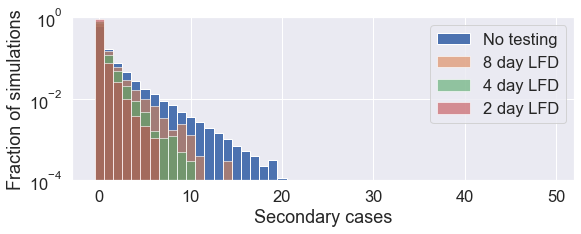

In [28]:
Nbins = np.arange(-0.5,50.5,1)
fig,ax = plt.subplots(figsize=(9,3))

ax.hist(dfball['NInfected'],bins=Nbins,label='No testing',density=True)
ax.hist(dfNCP1['NInfected'][dfNCP1['tperiod'] == 8],bins=Nbins,alpha=0.6,label='8 day LFD',density=True)
ax.hist(dfNCP1['NInfected'][dfNCP1['tperiod'] == 4],bins=Nbins,alpha=0.6,label='4 day LFD',density=True)
ax.hist(dfNCP1['NInfected'][dfNCP1['tperiod'] == 2],bins=Nbins,alpha=0.6,label='2 day LFD',density=True)
ax.legend()
ax.set_xlabel('Secondary cases')
ax.set_ylabel('Fraction of simulations')
ax.set_ylim(1E-4,1)
ax.set_yscale('log')

## 